# Music and the Brain 
---
__Anatomical image__ <br>
- sub-01_ses-01_T1 <br>
_"EchoTime"_ -> TE = 0.0035, <br>
_"RepetitionTime"_ -> TR = 2.53, <br>
<br>
- sub-01_ses-01_T2 <br>
_"EchoTime"_ -> TE = 0.408,, <br>
_"RepetitionTime"_ -> TR = 3.2, <br>


These are the imports that are going to be used throughout this code

In [1]:
import os #to read the directories
import nilearn
from nilearn import plotting
from nilearn import image
from nilearn.plotting import plot_anat, plot_img, plot_stat_map


Anatomical Images

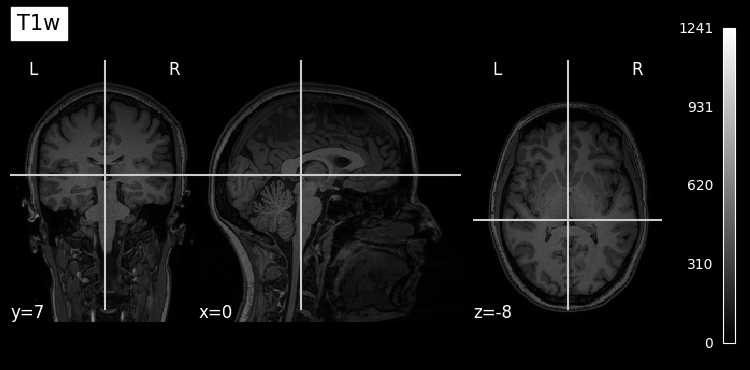

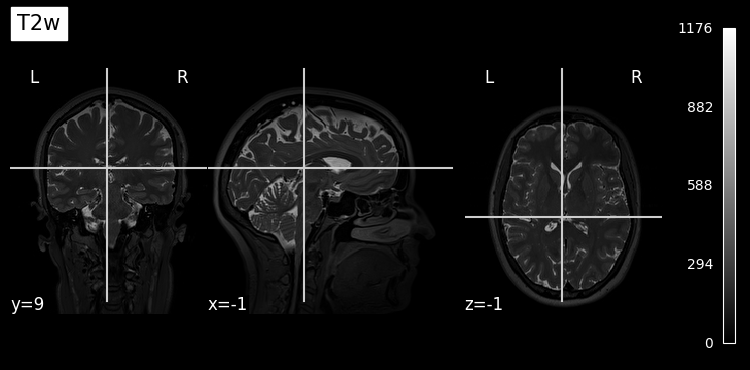

In [2]:

# The r before the string tells Python to treat the string as a raw string, 
# so it interprets the backslashes as literal characters rather than escape characters.
Directory_AnatomicalImage = "../data/sub-01/ses-01/anat"
file_Anatomical = [file for file in os.listdir(Directory_AnatomicalImage) if file.endswith('.nii.gz')] #they have to be with .nii.gz
file_paths_anat = [os.path.join(Directory_AnatomicalImage, file_name) for file_name in file_Anatomical] # Creates full paths to the files


Directory_fmap = "../data/sub-01/ses-01/fmap"
file_fmap = [file for file in os.listdir(Directory_fmap) if file.endswith('.nii.gz')]
file_paths_fmap = [os.path.join(Directory_fmap, file_name) for file_name in file_fmap]

# Now you can open the files and use them in your script
for file in file_paths_anat:
    try:
        image_info = file.split('_')[-1].split('.')[0] #Splits between the last _ and the .
        plot_anat(file, title=image_info, colorbar=True, cbar_tick_format="%i")
    except Exception as e:
        print(f"An error occurred while loading the file: {file}")
        print(f"Error: {str(e)}")
        


In [3]:
from nilearn.image import concat_imgs, mean_img
Directory_func = "../data/sub-01/ses-01/func"
file_func = [file for file in os.listdir(Directory_func) if file.endswith('.nii.gz')]
file_paths_func = [os.path.join(Directory_func, file_name) for file_name in file_func]


__Functional images__ <br>
_"RepetitionTime"_ -> TR = 1, <br>

In [4]:
# Concatenate the functional images
# fmri_img = concat_imgs(file_paths_func)

subject01_runs = {}
for i, file in enumerate(file_paths_func, start=1):
    subject01_runs [i] = file
    print(subject01_runs[i])


../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-1_bold.nii.gz
../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-2_bold.nii.gz
../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-3_bold.nii.gz
../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-4_bold.nii.gz


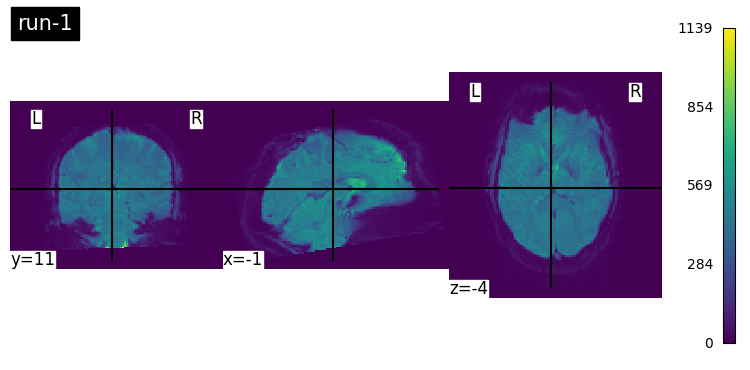

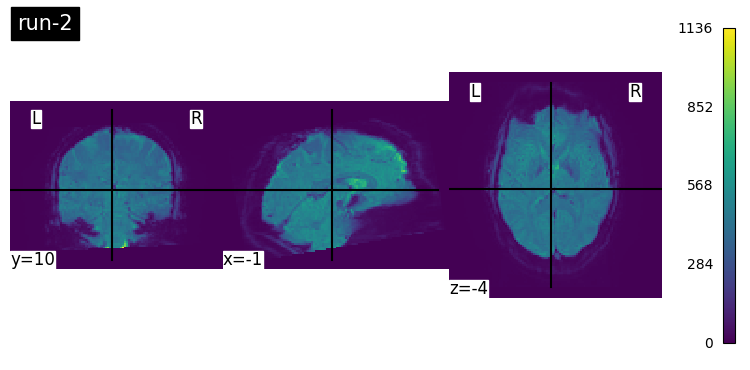

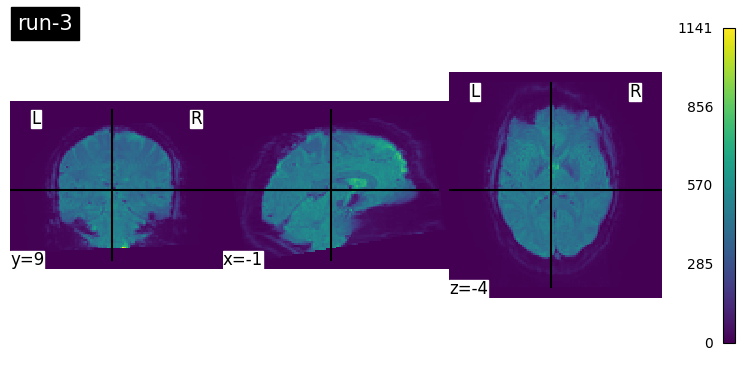

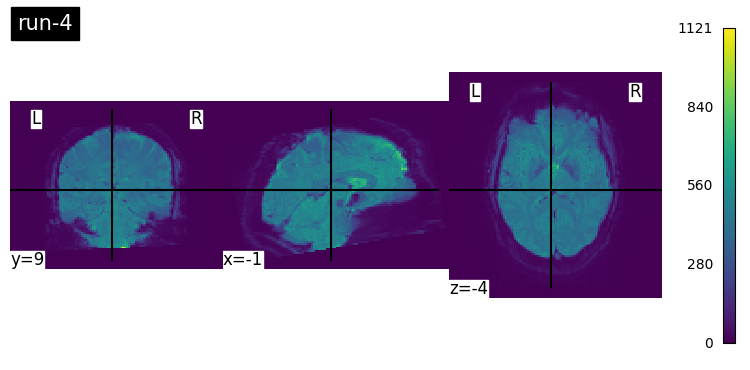

In [5]:
mean_fmri_imgs = {}

for i, file in subject01_runs.items():
    fmri_img = concat_imgs(file)
    
    image_info = file.split('_')[-2].split('.')[0] #Splits between the last _ and the .
    mean_fmri_img = mean_img(fmri_img)
    mean_fmri_imgs[file] = mean_fmri_img
    plot_img(mean_fmri_imgs[file], title=image_info, colorbar=True, cbar_tick_format="%i")

  
    


Table

In [6]:
import pandas as pd 
for i, file in mean_fmri_imgs.items():
    

    print(file)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (110, 110, 66)
affine:
[[-1.99716103e+00 -1.39420968e-03 -1.06515996e-01  1.14958969e+02]
 [ 1.66886933e-02  1.97103953e+00 -3.38709891e-01 -8.30593109e+01]
 [-1.05209745e-01  3.39117914e-01  1.96823001e+00 -7.69128571e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 110 110  66   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         2.         1.9999999  1.9999999  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
ca

In [7]:
Directory_func ="../data/sub-01/ses-01/func"
file_func_tsv = [file for file in os.listdir(Directory_func) if file.endswith('.tsv')]
file_paths_func_tsv = [os.path.join(Directory_func, file_name) for file_name in file_func_tsv]


In [8]:
subject01_tsv = {}
for i, file in enumerate(file_paths_func_tsv, start=1):
    subject01_tsv [i] = file
    print(subject01_tsv[i])

../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-2_events.tsv
../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-3_events.tsv
../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-4_events.tsv


In [9]:
for i, file in subject01_tsv.items():
    events = pd.read_table(file)
    image_info = os.path.basename(file)
    print()
    print(image_info) #pd.read_table function is used to read a general delimited file into a pandas DataFrame
    print(events) #this would display the DataFrame as a table.


sub-01_ses-01_task-02a_run-2_events.tsv
     onset  duration        trial_type
0     0.00     12.26             Noise
1    12.26     23.98     Transcendence
2    36.24      6.01             Noise
3    42.25     24.00     Transcendence
4    66.25     17.99             Noise
5    84.24     24.05           Sadness
6   108.29      5.98             Noise
7   114.26     24.00           Sadness
8   138.26     18.03             Noise
9   156.30     23.98           Tension
10  180.28      6.01             Noise
11  186.29     23.96           Tension
12  210.26     18.03             Noise
13  228.28     23.98  JoyfulActivation
14  252.26      6.02             Noise
15  258.28     24.00  JoyfulActivation
16  282.28     18.03             Noise
17  300.31     23.94             Power
18  324.25      6.01             Noise
19  330.27     24.00             Power
20  354.27     17.98             Noise
21  372.25     24.08        Tenderness
22  396.33      5.94             Noise
23  402.27     24.30   

### Perfoming the GLM analysis

In [10]:
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt

fmri_glm = FirstLevelModel(t_r=1, noise_model='ar1', standardize = False, hrf_model = "spm", drift_model="cosine", high_pass=0.01)


sub-01_ses-01_task-02a_run-2_bold.nii.gz


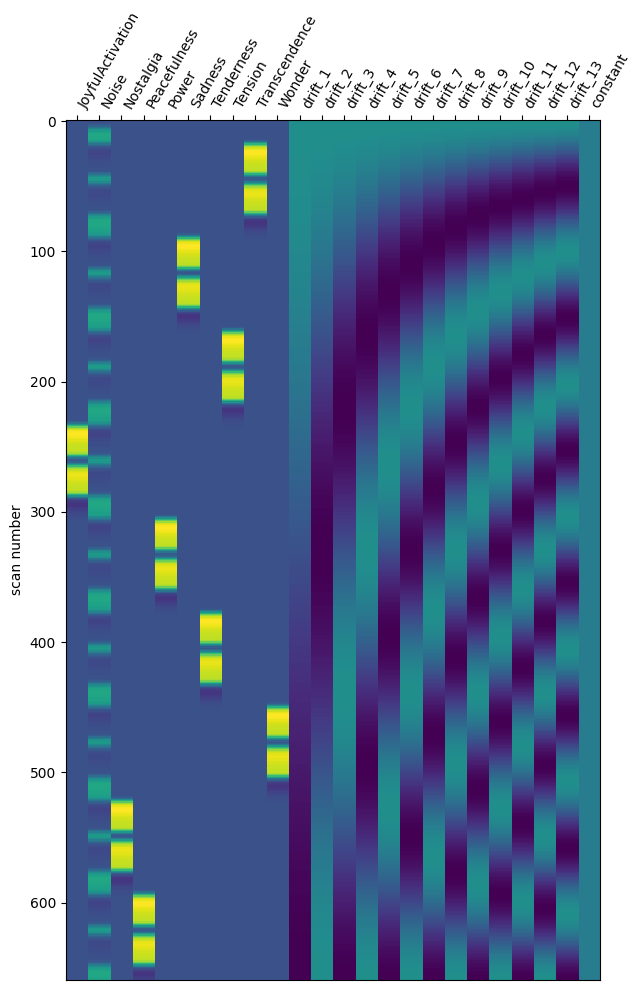


sub-01_ses-01_task-02a_run-3_bold.nii.gz


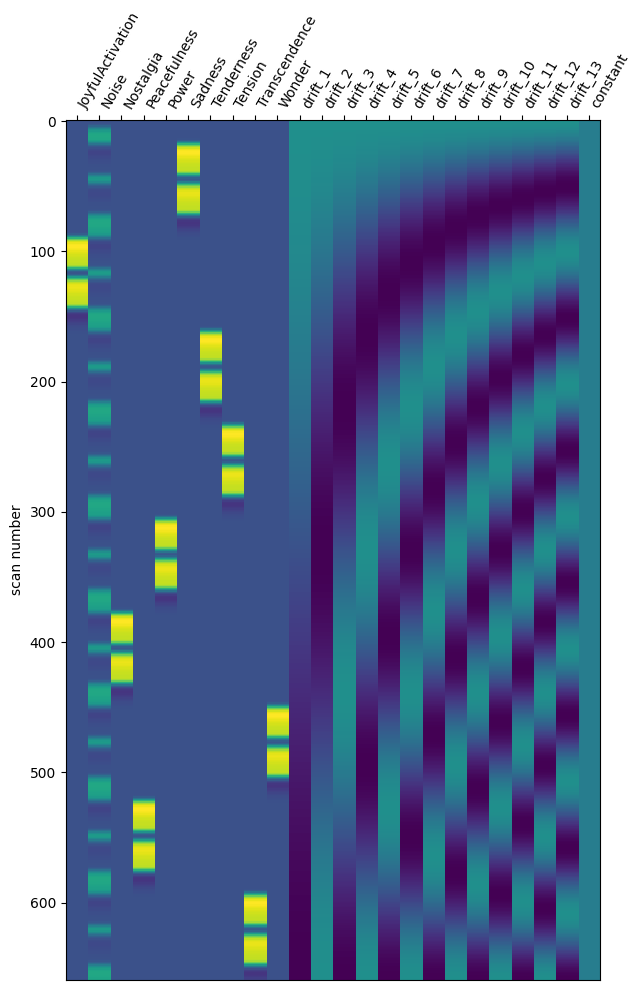


sub-01_ses-01_task-02a_run-4_bold.nii.gz


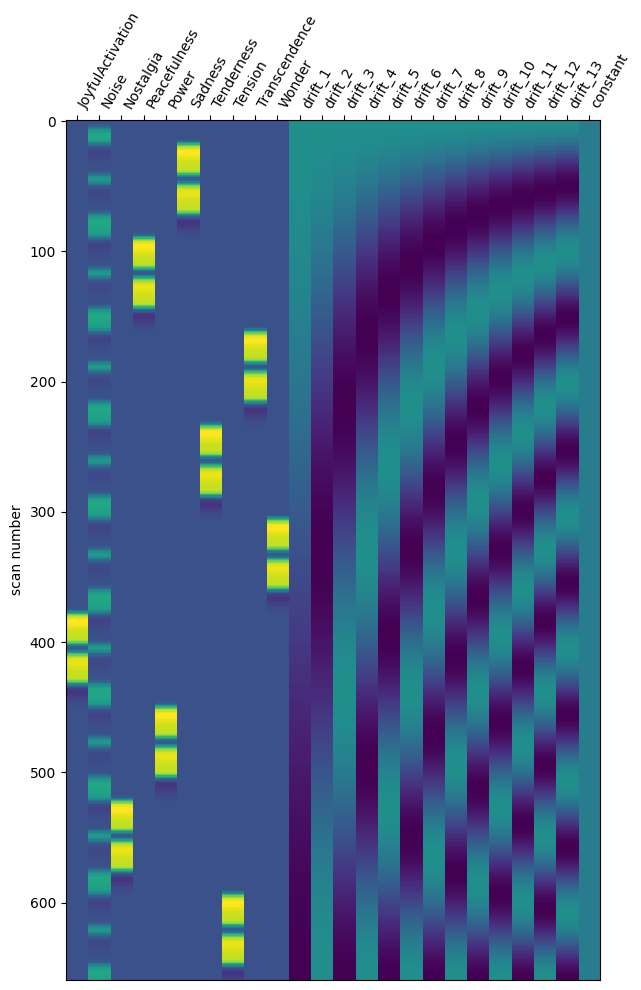

In [11]:
fmri_glm_dictionary = {}

for i, file in list(subject01_runs.items())[1:]:
    fmri_img = concat_imgs(file)
    events_file = subject01_tsv[i-1]
    events = pd.read_table(events_file)

    fmri_glm_i = fmri_glm.fit(fmri_img, events)
    fmri_glm_dictionary [i] =  fmri_glm_i

    design_matrix = fmri_glm.design_matrices_[0] 
    image_info = os.path.basename(file)
    print()
    print(image_info)
    plot_design_matrix(design_matrix)
    plt.show()
    

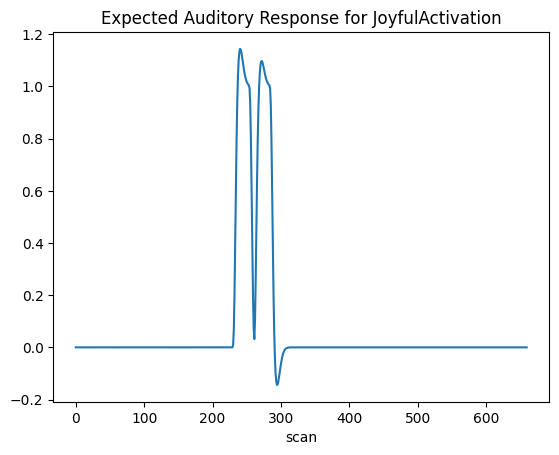

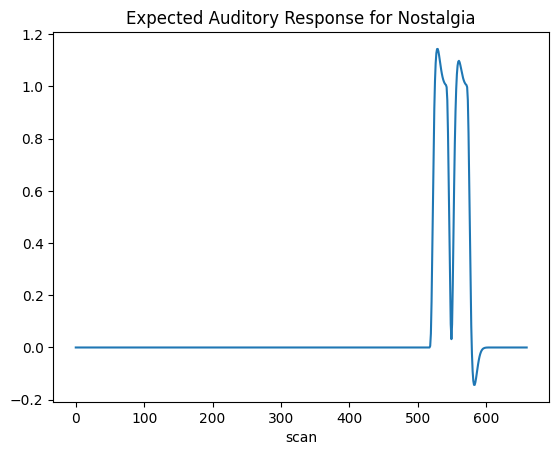

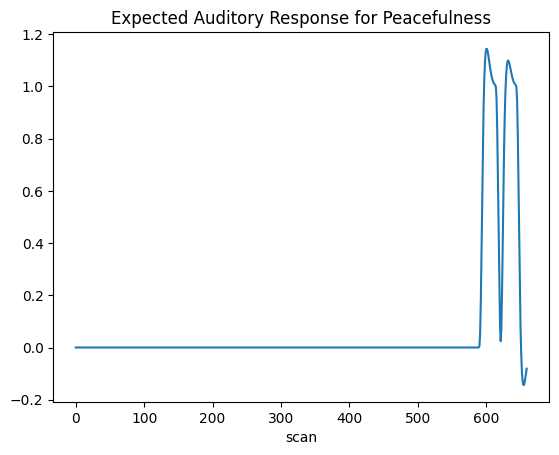

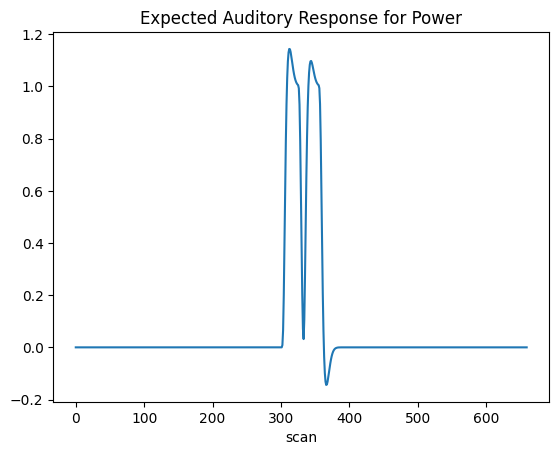

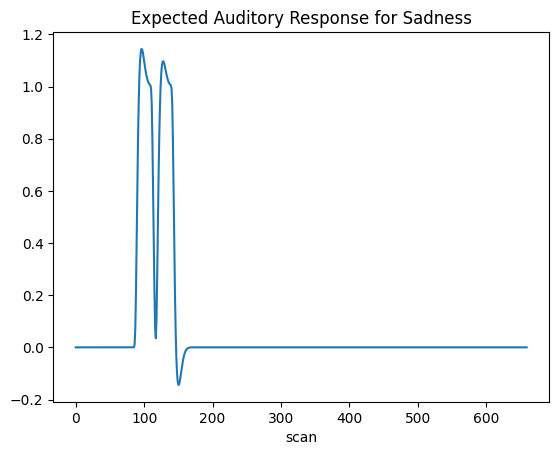

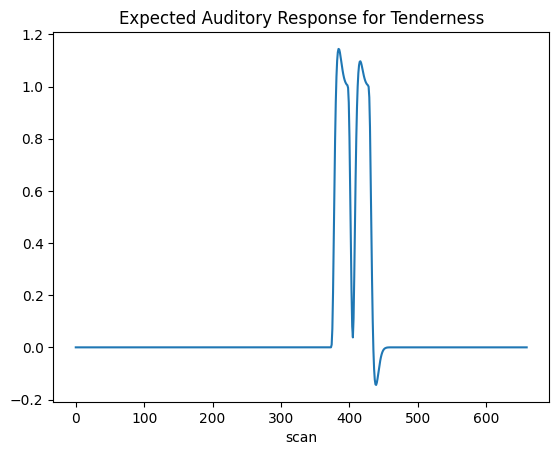

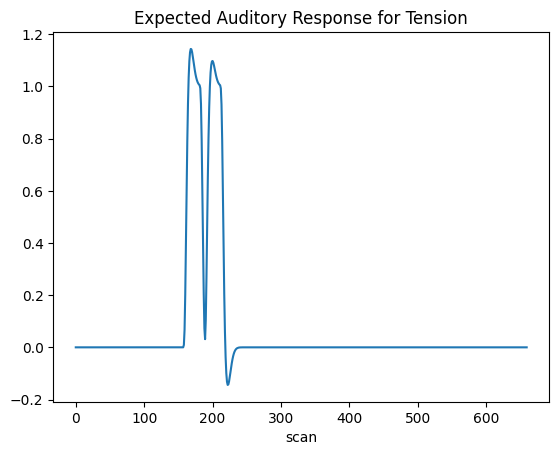

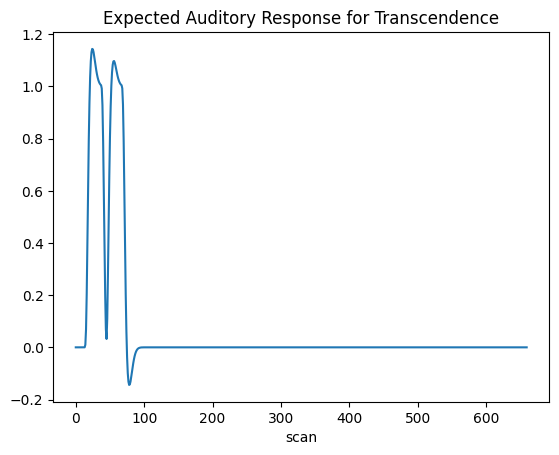

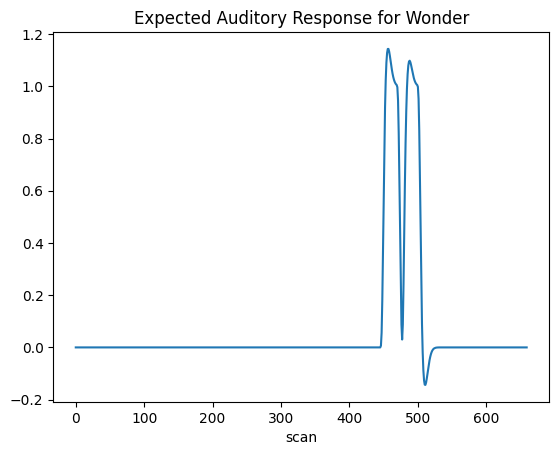

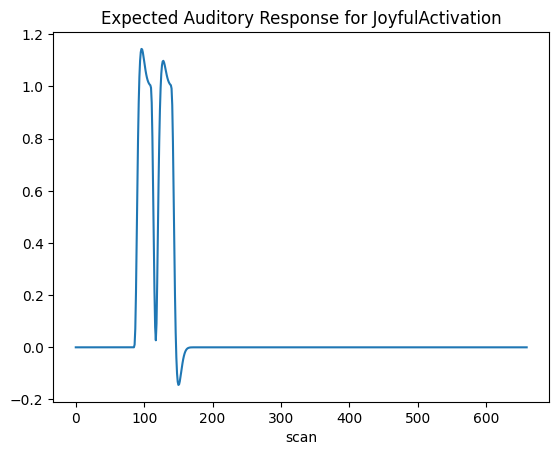

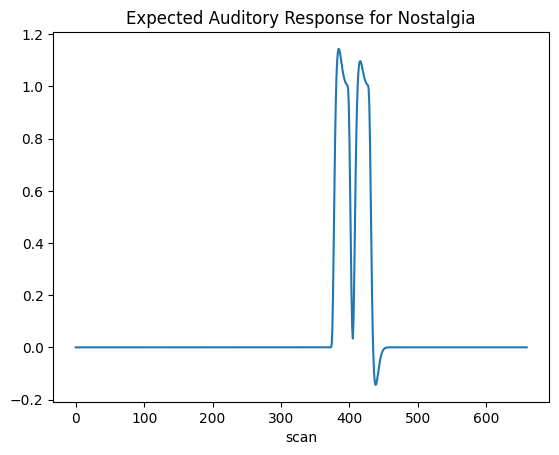

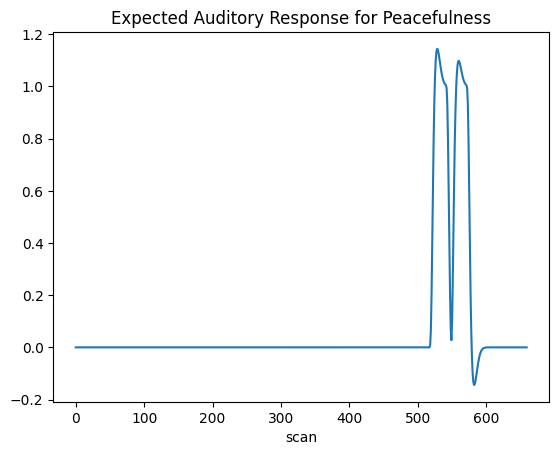

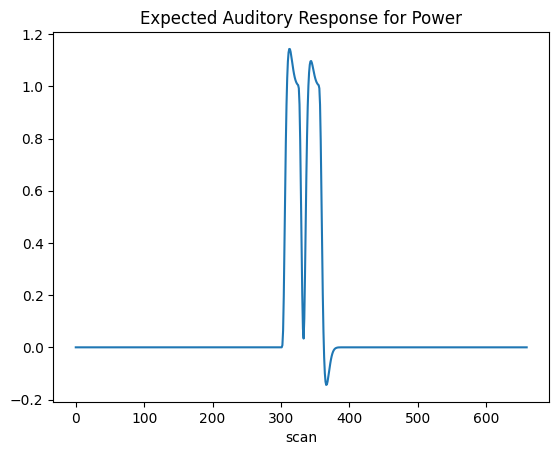

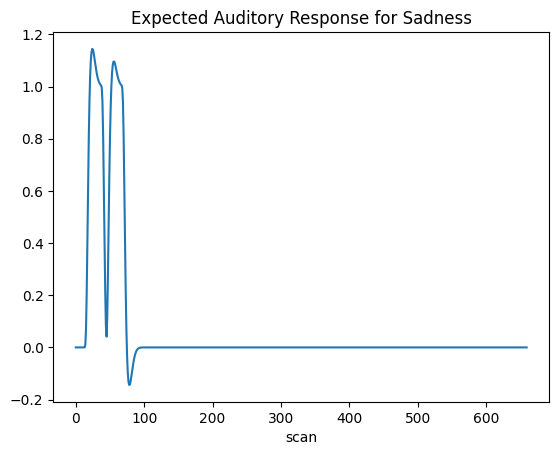

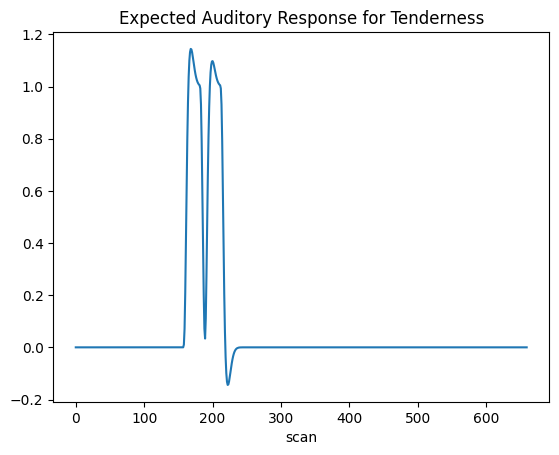

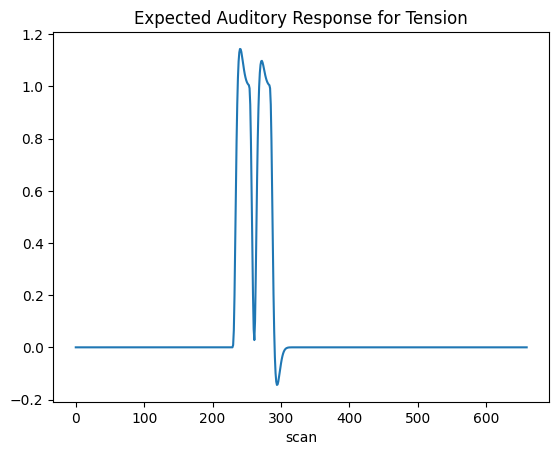

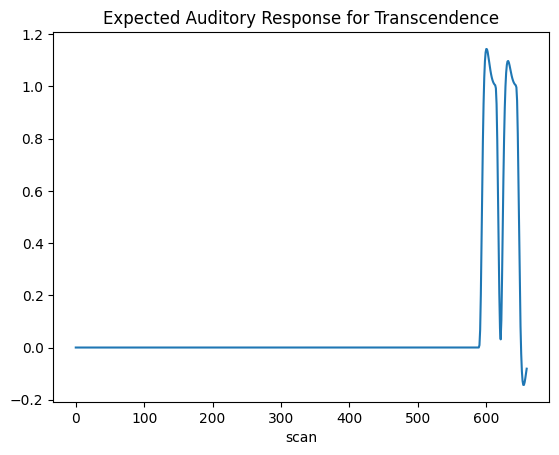

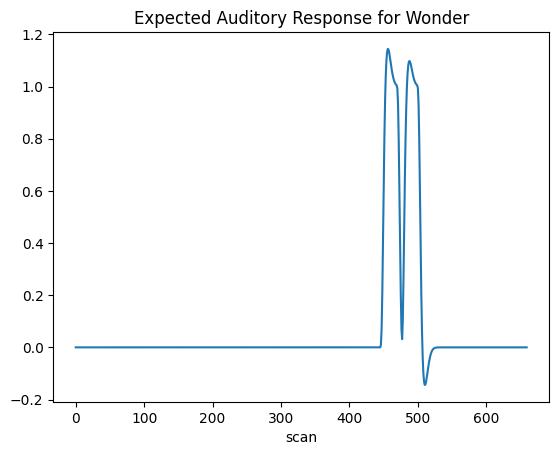

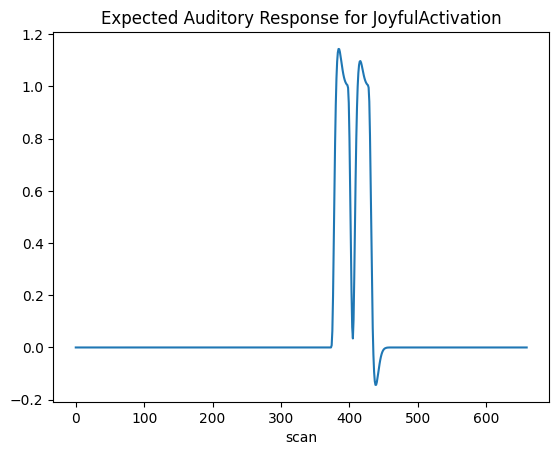

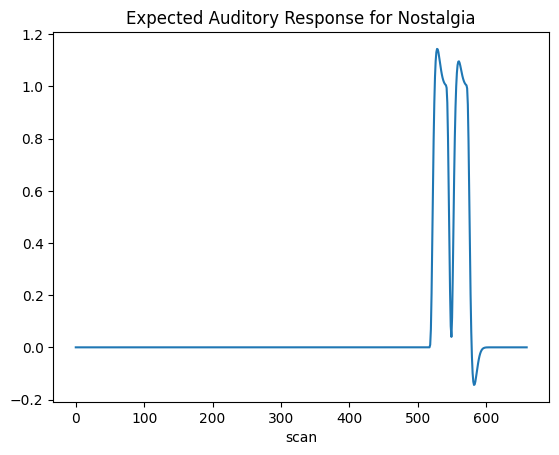

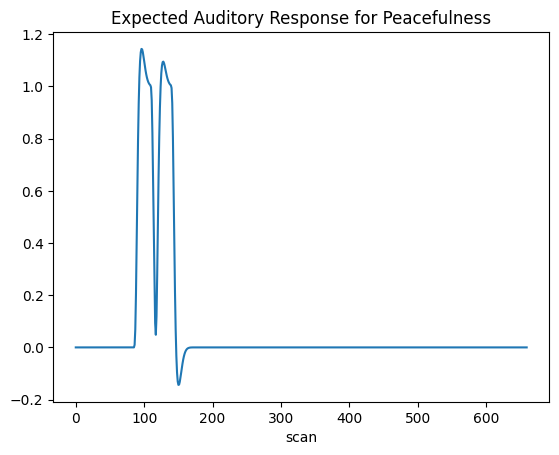

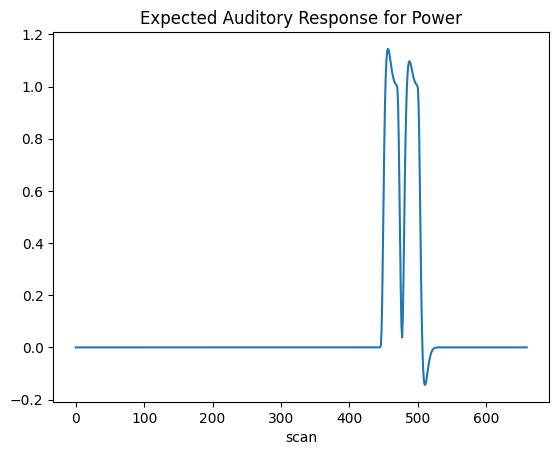

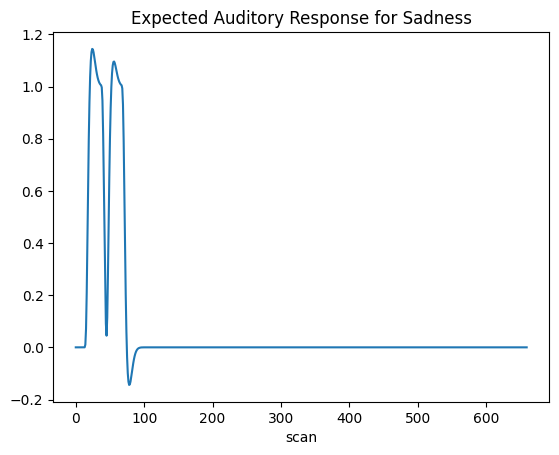

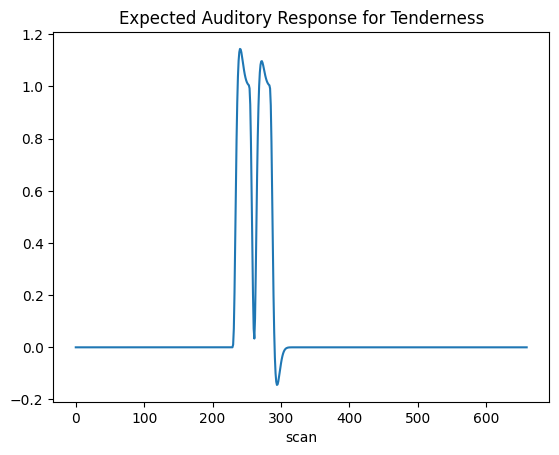

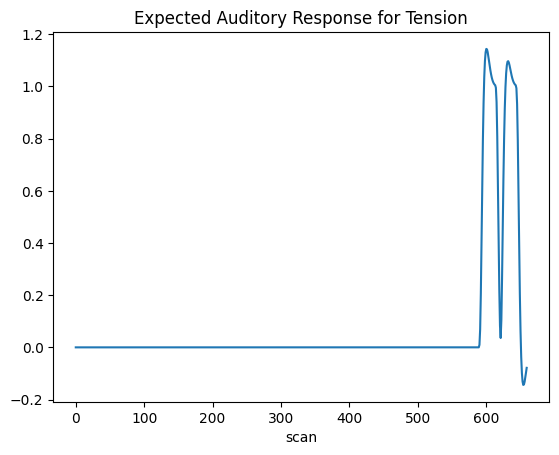

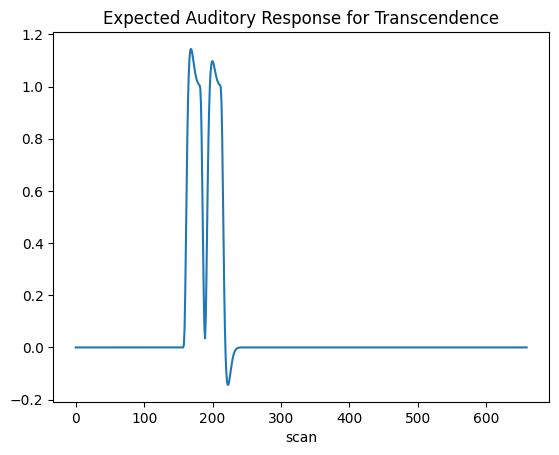

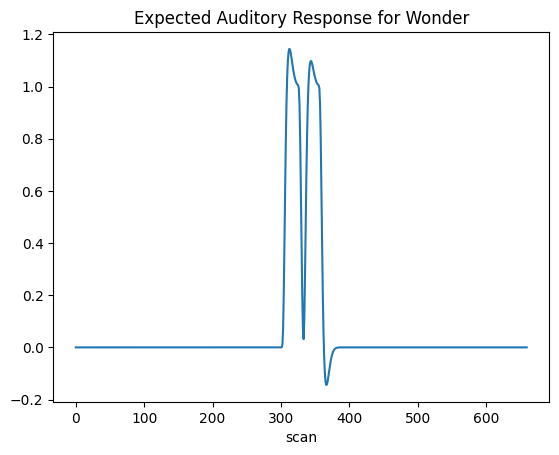

In [12]:
conditions = ['JoyfulActivation', 'Nostalgia', 'Peacefulness', 'Power', 'Sadness', 'Tenderness', 'Tension', 'Transcendence', 'Wonder']
for i, file in list(subject01_runs.items())[1:]:
    fmri_img = concat_imgs(file)
    events_file = subject01_tsv[i-1]
    events = pd.read_table(events_file)

    fmri_glm = fmri_glm.fit(fmri_img, events)
    design_matrix = fmri_glm.design_matrices_[0] 
    image_info = os.path.basename(file)
    #print()
    #print(image_info)
    
    # Plot the expected auditory response
    # for condition in conditions:
    #     plt.plot(design_matrix[condition])
    #     plt.xlabel("scan")
    #     plt.title(f"Expected Auditory Response for {condition}")
    #     plt.show()

In [13]:
import numpy as np
conditions_list = ['JoyfulActivation', 'Noise', 'Nostalgia', 'Peacefulness', 'Power', 'Sadness', 'Tenderness', 'Tension', 'Transcendence', 'Wonder']
conditions = {}

for i, condition in enumerate(conditions_list):
    conditions[condition] = np.zeros(24)
   
    conditions[condition][i] = 1

print(conditions)

{'JoyfulActivation': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), 'Noise': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), 'Nostalgia': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), 'Peacefulness': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), 'Power': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), 'Sadness': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), 'Tenderness': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), 'Tension': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), 

{'JoyfulActivation': array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'Nostalgia': array([ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'Peacefulness': array([ 0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'Power': array([ 0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'Sadness': array([ 0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'Tenderness': array([ 0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'Tension': array([ 0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 

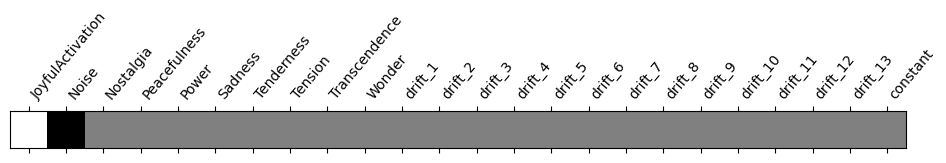

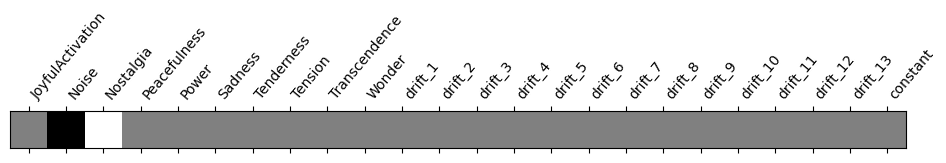

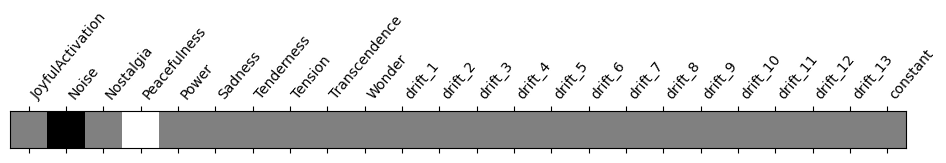

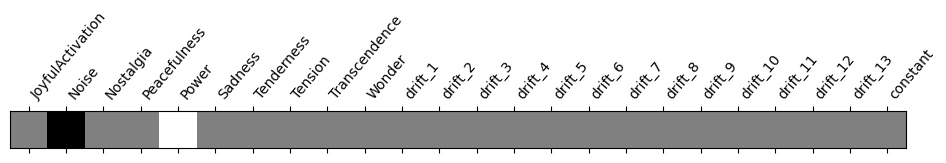

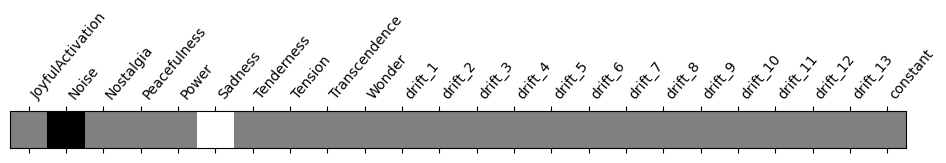

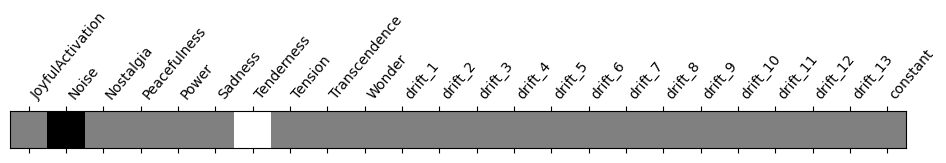

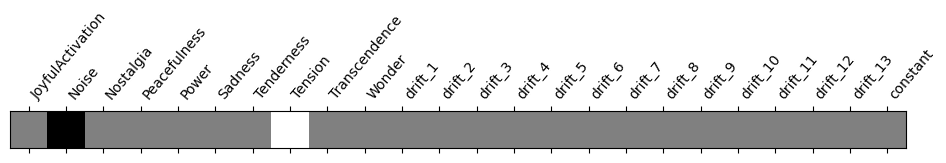

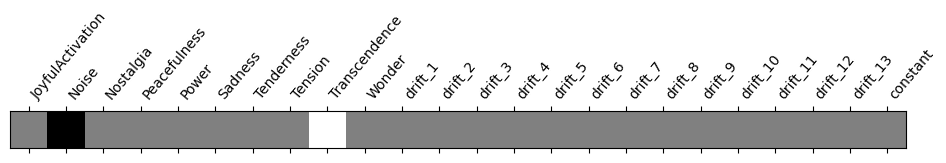

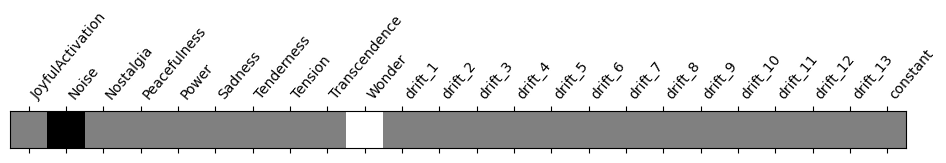

In [14]:
from nilearn.plotting import plot_contrast_matrix

contrasts={}

for condition in conditions_list:
    if condition != 'Noise':
        contrast = conditions[condition] - conditions['Noise']
        contrasts[condition] = contrast
        plot_contrast_matrix(contrast, design_matrix=design_matrix)
        # eff_map = fmri_glm.compute_contrast(contrast, output_type="effect_size")
        
    
print(contrasts)

# active_minus_rest = conditions["JoyfulActivation"] - conditions["Noise"]
# plot_contrast_matrix(active_minus_rest, design_matrix=design_matrix)

# active_minus_rest = conditions["Nostalgia"] - conditions["Noise"]
# plot_contrast_matrix(active_minus_rest, design_matrix=design_matrix)

In [15]:
for (i, mean_img_i), (j, glm_j) in zip(list(mean_fmri_imgs.items())[1:], fmri_glm_dictionary.items()):
    #print(i, j)
    #print(mean_img_i)
    print(glm_j)

FirstLevelModel(hrf_model='spm', t_r=1)
FirstLevelModel(hrf_model='spm', t_r=1)
FirstLevelModel(hrf_model='spm', t_r=1)


In [16]:
for (i, mean_img_i), (j, glm_j) in zip(list(mean_fmri_imgs.items())[1:], fmri_glm_dictionary.items()):
    print(i)
    for contrast_name, contrast in contrasts.items():

        eff_map=glm_j.compute_contrast(contrast, output_type="effect_size")
        z_map = glm_j.compute_contrast(contrast, output_type="z_score")
        plot_title = f"Active minus Rest (Z>3) for contrast {contrast_name} and glm {j}"
        
        plotting.view_img(eff_map, bg_img=mean_img_i, threshold=2.0)
        #plot_stat_map(z_map, bg_img=mean_img_i, threshold=3.0, display_mode="z",cut_coords=3,black_bg=True, title=plot_title)
        plt.show()
plt.show()
        

../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-2_bold.nii.gz


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: War

../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-3_bold.nii.gz


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: War

../data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-4_bold.nii.gz


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: War

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



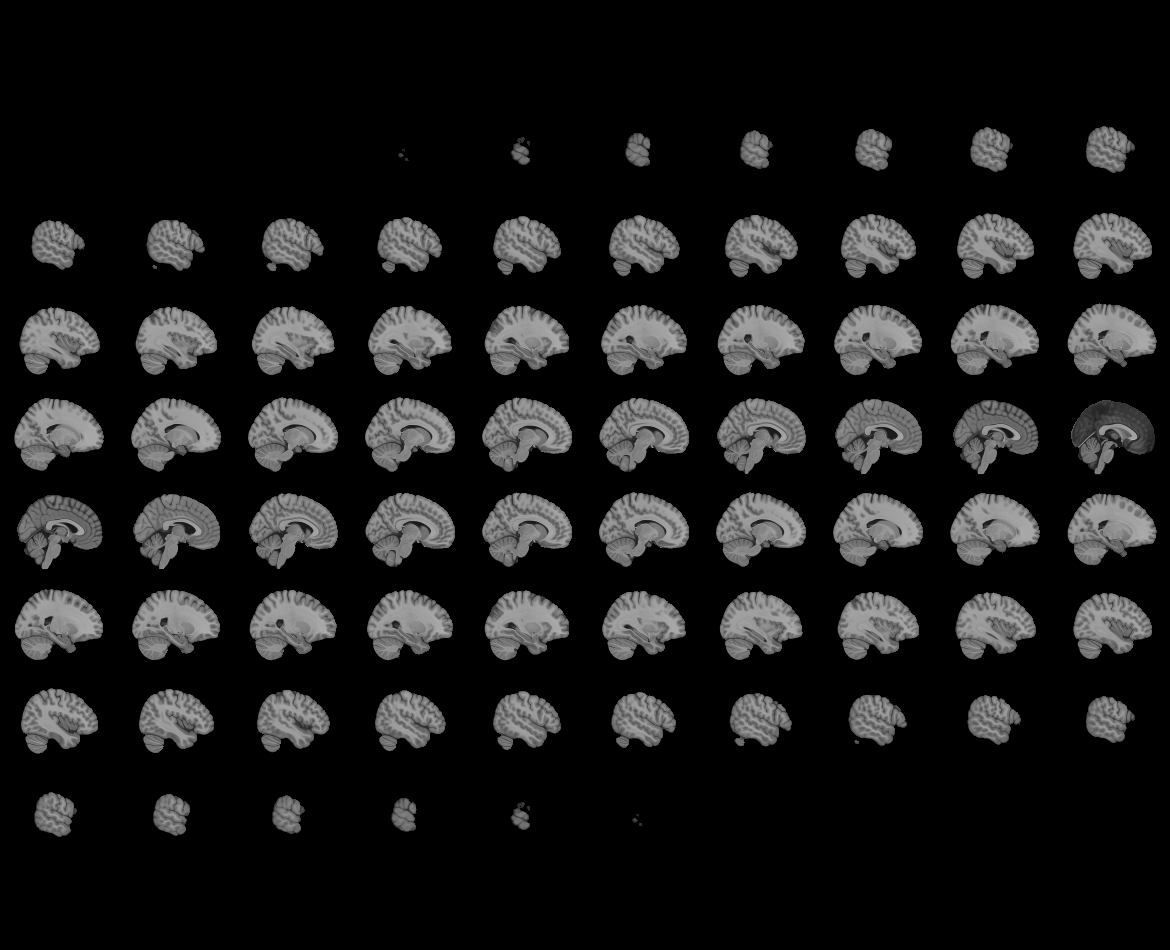
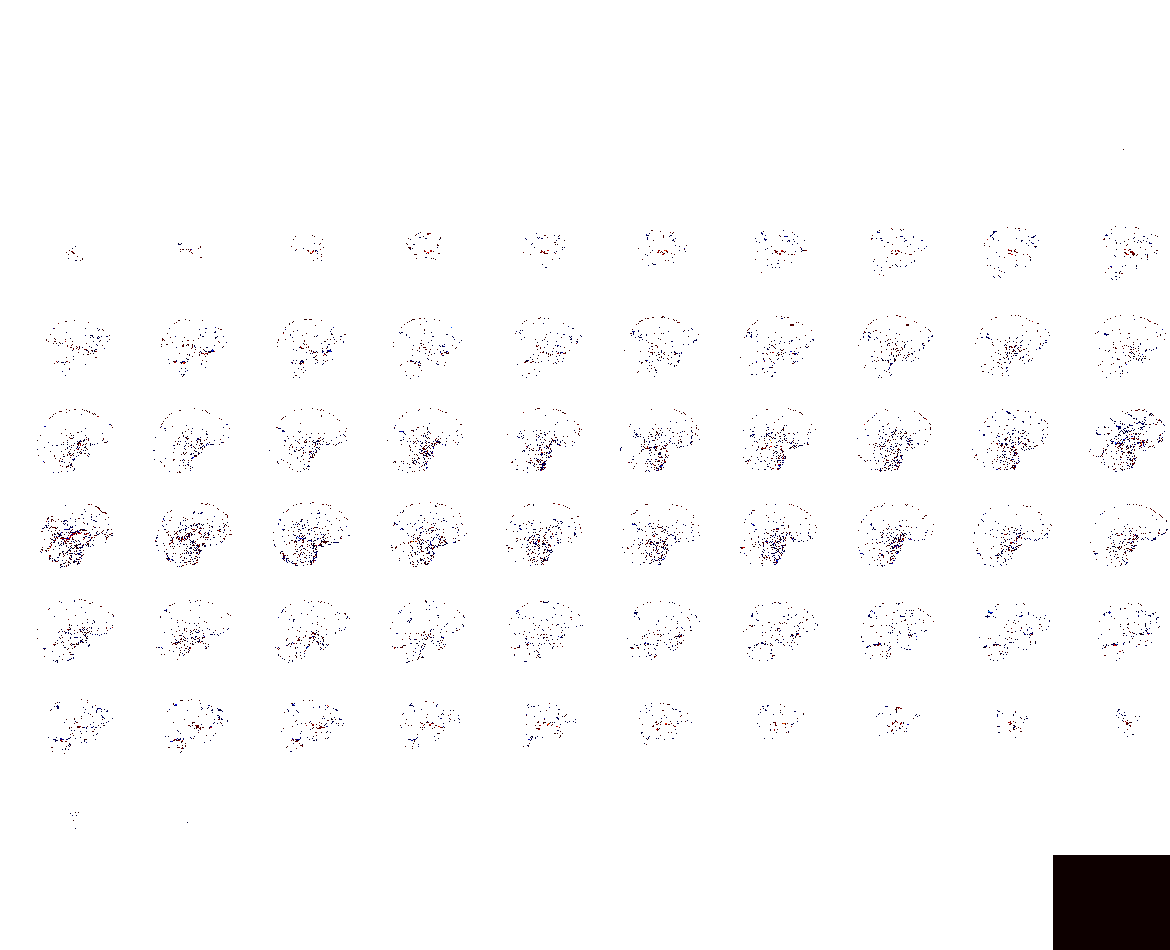

In [17]:
from nilearn import plotting
plotting.view_img(eff_map, threshold=2.0)
